In [7]:
# Multi-class classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib  inline

from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X  = iris.data

In [4]:
Y = iris.target

In [9]:
from sklearn.datasets import make_blobs

In [11]:
X,y = make_blobs(n_samples = 500, centers = 4, random_state = 8, cluster_std = 2.4)

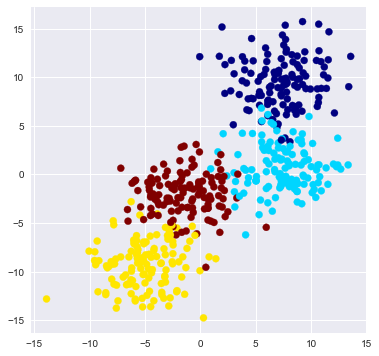

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y, s= 50,cmap ='jet')

In [20]:
X[:,1]

array([  1.07684647,  -8.49270872,  -2.80979462,  -0.27620621,
        12.16955042,  -4.81571386,  -8.6536682 , -10.14011553,
        -8.49782188,  15.33780796,   2.71136019,  -8.50218035,
         8.07104895,  12.60240072,  -8.45858333, -11.54252584,
        10.04943649,  -4.95053236,  -0.34084278,  -6.95668615,
         6.03480565,  -3.44748449,  -2.11546643, -10.44698102,
        -2.56593727,   0.73537406,   1.54560469,  -0.37614222,
        -5.51852055,  14.66174834,  -9.10708273,  -2.80105229,
        -3.47177908,  -5.19352229,   1.46658211,  10.69285339,
        -0.85699448,  12.10569366, -12.17270406,  -4.14912052,
        -4.07206513,  -1.45991744,   7.8133346 ,  -4.35019277,
         0.07450943,  -4.730032  ,  10.50515257,  12.13100832,
        13.00256057,  -9.91419593,   0.26324415,  -3.40157052,
        -1.04477347,  10.79102418,  10.26962784,  -0.16278637,
       -11.40508191,   6.31107182,  -6.86392679,  -0.81155744,
         9.55213192,   9.62354306,  10.10852214, -12.75

In [19]:
X

array([[  8.031223  ,   1.07684647],
       [  0.79275323,  -8.49270872],
       [ -6.24741713,  -2.80979462],
       [  7.1350517 ,  -0.27620621],
       [  8.75371186,  12.16955042],
       [ -6.52850085,  -4.81571386],
       [ -5.68423308,  -8.6536682 ],
       [ -4.40557029, -10.14011553],
       [ -7.18713979,  -8.49782188],
       [  7.67125718,  15.33780796],
       [  7.05472091,   2.71136019],
       [ -6.44972594,  -8.50218035],
       [  7.3175591 ,   8.07104895],
       [  9.435827  ,  12.60240072],
       [ -3.94302873,  -8.45858333],
       [ -5.82070544, -11.54252584],
       [  5.45439833,  10.04943649],
       [  1.23496178,  -4.95053236],
       [  0.99142387,  -0.34084278],
       [ -4.89204127,  -6.95668615],
       [  6.09686891,   6.03480565],
       [ -0.70549841,  -3.44748449],
       [ -0.18012153,  -2.11546643],
       [ -3.20156642, -10.44698102],
       [  0.95069301,  -2.56593727],
       [ -0.75648703,   0.73537406],
       [ -0.74705664,   1.54560469],
 

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

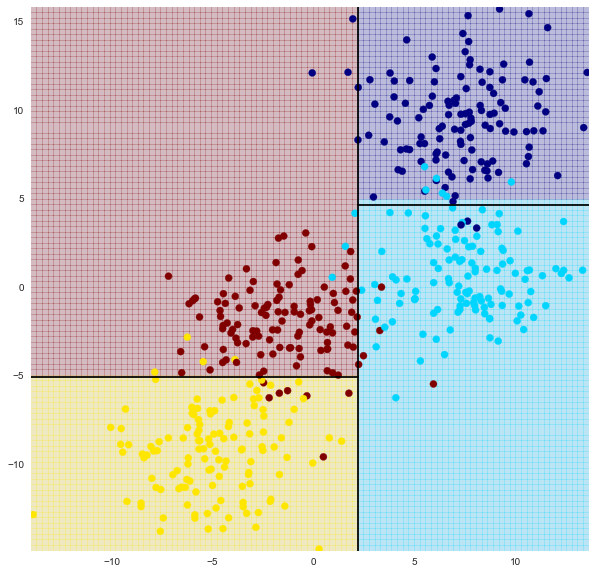

In [23]:

# Set model variable
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

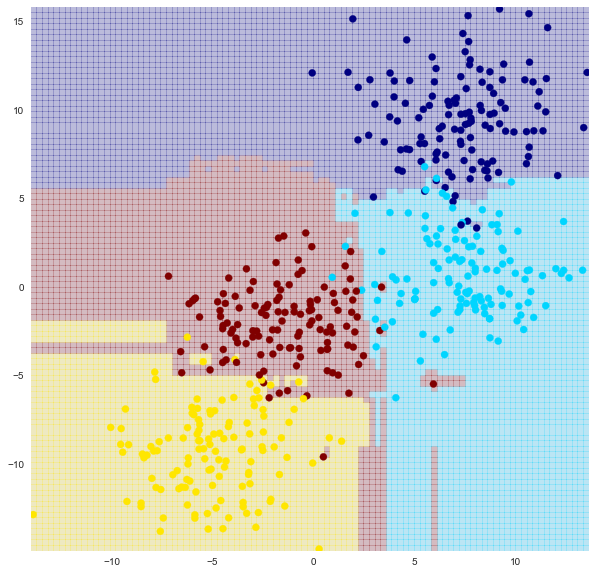

In [24]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0)

# Get rid of boundaries to avoid error
visualize_tree(clf,X,y,boundaries=False)